In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
numEpocas = 5000
     # Número de épocas.

tamanho = pd.read_csv('winequality-red.csv')
q = len(tamanho)  # Número de amostras

eta = 0.1            # Taxa de aprendizado

m = 11                # Número de neurônios na camada de entrada 
N = [15,10,5]         # Número de neurônios em cada camada escondida. A professora pediu minimo 3
L = 1                 # Número de neurônios na camada de saída. (-1 = Vinho ruim E 1 = Vinho bom)

In [63]:
# Dados

FixedAcidity = pd.read_csv('winequality-red.csv', usecols=[0])
FixedAcidity = np.array(FixedAcidity).flatten()

VolatileAcidity = pd.read_csv('winequality-red.csv', usecols=[1])
VolatileAcidity = np.array(VolatileAcidity).flatten()

CitricAcid = pd.read_csv('winequality-red.csv', usecols=[2])
CitricAcid = np.array(CitricAcid).flatten()

ResidualSugar = pd.read_csv('winequality-red.csv', usecols=[3])
ResidualSugar = np.array(ResidualSugar).flatten()

Chlorides = pd.read_csv('winequality-red.csv', usecols=[4])
Chlorides = np.array(Chlorides).flatten()

FreeSulfurDioxide = pd.read_csv('winequality-red.csv', usecols=[5])
FreeSulfurDioxide = np.array(FreeSulfurDioxide).flatten()

TotalSulfurDioxide = pd.read_csv('winequality-red.csv', usecols=[6])
TotalSulfurDioxide = np.array(TotalSulfurDioxide).flatten()

Density = pd.read_csv('winequality-red.csv', usecols=[7])
Density = np.array(Density).flatten()

pH = pd.read_csv('winequality-red.csv', usecols=[8])
pH = np.array(pH).flatten()

Sulphates = pd.read_csv('winequality-red.csv', usecols=[9])
Sulphates = np.array(Sulphates).flatten()

Alcohol = pd.read_csv('winequality-red.csv', usecols=[10])
Alcohol = np.array(Alcohol).flatten()

Quality = pd.read_csv('winequality-red.csv', usecols=[11])
Quality = np.array(Quality).flatten()


In [64]:
# Entrada do perceptron
X = np.vstack((FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, 
               Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Density, 
               pH, Sulphates, Alcohol))

# Resultado para saida
d = np.array([1 if q >= 6 else -1 for q in Quality])

# Bias
bias = 1

# Array para armazenar os erros.
E = np.zeros(q)
Etm = np.zeros(numEpocas)

# Matrizes de pesos
W1 = np.random.uniform(-0.5, 0.5, (N[0], m + 1))
W2 = np.random.uniform(-0.5, 0.5, (N[1], N[0] + 1))
W3 = np.random.uniform(-0.5, 0.5, (N[2], N[1] + 1))
W4 = np.random.uniform(-0.5, 0.5, (L, N[2] + 1))

# Funcoes
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def deriv_relu(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def deriv_tanh(x):
    return 1 - np.tanh(x)**2

# caso queira testar com outra função só trocar aqui embaixo
funcao_ativacao = tanh  
derivada_funcao = deriv_tanh  


i = 0   E = 0.4740670086781991
i = 1   E = 0.4708325424171061
i = 2   E = 0.4681793798339776
i = 3   E = 0.4625528167498652
i = 4   E = 0.4640911063414031
i = 5   E = 0.4620558753035064
i = 6   E = 0.4601372625770045
i = 7   E = 0.45947885418349094
i = 8   E = 0.4578441474254289
i = 9   E = 0.4586220362732069
i = 10   E = 0.45894713483940636
i = 11   E = 0.4532913230897113
i = 12   E = 0.45445742577832066
i = 13   E = 0.45687705052717376
i = 14   E = 0.4565752896031531
i = 15   E = 0.4561807696905656
i = 16   E = 0.45913528608314036
i = 17   E = 0.45735907847040463
i = 18   E = 0.45928479332070554
i = 19   E = 0.45705949566756715
i = 20   E = 0.458420874031771
i = 21   E = 0.4590524465901007
i = 22   E = 0.4587856335495071
i = 23   E = 0.4581354317977184
i = 24   E = 0.45752808986397636
i = 25   E = 0.45799509145166756
i = 26   E = 0.4598473046887769
i = 27   E = 0.45885940915944784
i = 28   E = 0.45952902215862745
i = 29   E = 0.4605792385964958
i = 30   E = 0.46006298532730083
i = 31

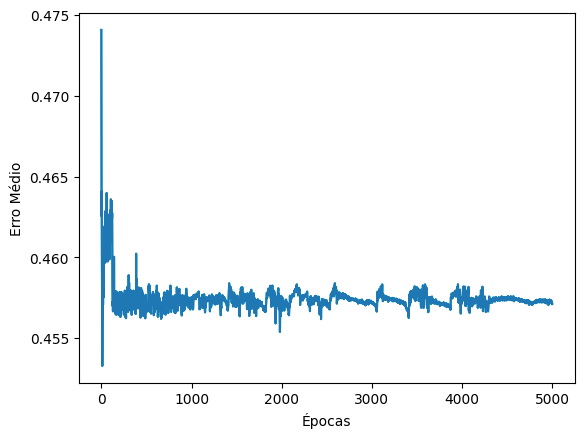

In [65]:
# ===============================================================
# TREINAMENTO.
# ===============================================================

for i in range(numEpocas): # repete conforme num de epococas
    for j in range(q):
        
        Xb = np.hstack((bias, X[:, j])) # empilhando junto com o bias

        # camada oculta 1
        o1 = funcao_ativacao(np.dot(W1, Xb))  
        o1b = np.insert(o1, 0, bias)

        # camada oculta 2
        o2 = funcao_ativacao(np.dot(W2, o1b))
        o2b = np.insert(o2, 0, bias)

        # camada oculta 3
        o3 = funcao_ativacao(np.dot(W3, o2b))  
        o3b = np.insert(o3, 0, bias)
        
        # Saida
        Y = funcao_ativacao(np.dot(W4, o3b))

        # Erro 
        e = d[j] - Y  

        # Erro total
        E[j] = (e.transpose().dot(e))/2  

        delta4 = e * derivada_funcao(Y)
        vdelta3 = W4.T.dot(delta4)
        delta3 = vdelta3[1:] * derivada_funcao(o3)

        vdelta2 = W3.T.dot(delta3)
        delta2 = vdelta2[1:] * derivada_funcao(o2)

        vdelta1 = W2.T.dot(delta2)
        delta1 = vdelta1[1:] * derivada_funcao(o1)

        # Atualização dos pesos.
        W4 += eta * np.outer(delta4, o3b)
        W3 += eta * np.outer(delta3, o2b)
        W2 += eta * np.outer(delta2, o1b)
        W1 += eta * np.outer(delta1, Xb)

    # Imprime o número da época e o Erro Total.
    print('i = ' + str(i) + '   E = ' + str(E.mean()))
    Etm[i] = E.mean()

plt.xlabel("Épocas")
plt.ylabel("Erro Médio")
plt.plot(Etm, color='c')
plt.plot(Etm)
plt.show()    


In [66]:
#################
# TESTE DA REDE #
#################

Error_Test = np.zeros(q)

for i in range(q):
    # Insere o bias no vetor de entrada.
    Xb = np.hstack((bias, X[:,i]))

    # camada oculta 1
    o1 = funcao_ativacao(np.dot(W1, Xb))  
    o1b = np.insert(o1, 0, bias)

    # camada oculta 2
    o2 = funcao_ativacao(np.dot(W2, o1b))
    o2b = np.insert(o2, 0, bias)

    # camada oculta 3
    o3 = funcao_ativacao(np.dot(W3, o2b))  
    o3b = np.insert(o3, 0, bias)
    
    # Saida
    Y = funcao_ativacao(np.dot(W4, o3b))
    
    Error_Test[i] = d[i] - Y.item()
    
print(Error_Test)
print(d)
print(np.round(Error_Test) - d) 

[-1.30873023 -1.30873023 -1.30873023 ...  0.55658513 -1.44341487
  0.68296128]
[-1 -1 -1 ...  1 -1  1]
[0. 0. 0. ... 0. 0. 0.]
